In [1]:
from chessimage.image_scrape_utils import *

8/8/1K6/PP1P4/pk1p4/6R1/8/8 w - - 0 1
. . . . . . . .
. . . . . . . .
. K . . . . . .
P P . P . . . .
p k . p . . . .
. . . . . . R .
. . . . . . . .
. . . . . . . .
0.16766119003295898
0.035471439361572266
0.0032041072845458984
7.939338684082031e-05
0.12885141372680664
Our time: 9
Opp time: 3


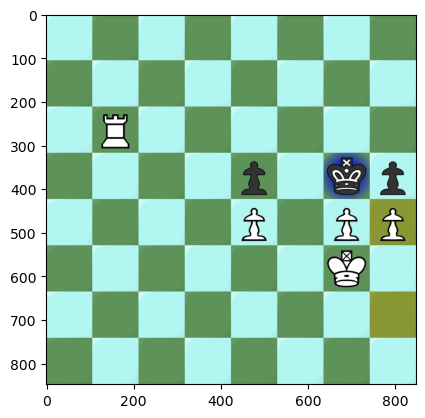

In [2]:
import time
import chess
import matplotlib.pyplot as plt

time.sleep(5)
    
start = time.time()

board_img = capture_board(shift=False)
top_clock_img = capture_top_clock(state="end1")
bot_clock_img = capture_bottom_clock(state="end1")
w_notation_img = capture_white_notation()

capture_end = time.time()
clock_read_start = time.time()
our_time = read_clock(bot_clock_img)
opp_time = read_clock(top_clock_img)
clock_read_end = time.time()

# our_turn = is_our_turn_from_clock(bot_clock_img)
# white_turn = is_white_turn_from_notation(w_notation_img)


# if our_turn == white_turn:
#     bottom = "w"
# else:
#     bottom = "b"
bottom = "b"
turn_read_end = time.time()


fen = get_fen_from_image(board_img, bottom=bottom)    
end = time.time()
print(fen)
print(chess.Board(fen))
print(end-start)
print(capture_end-start)
print(clock_read_end - clock_read_start)
print(turn_read_end - clock_read_end)
print(end - turn_read_end)
print("Our time:", our_time)
print("Opp time:", opp_time)

plt.imshow(board_img)

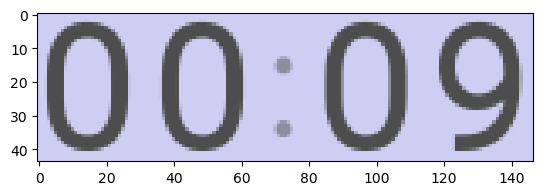

In [3]:
plt.imshow(bot_clock_img)

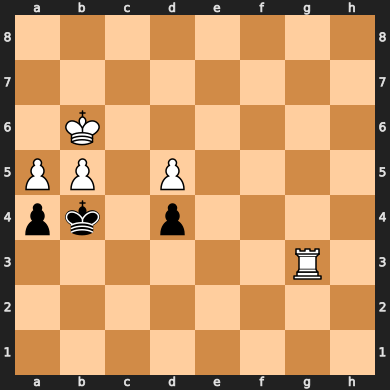

In [4]:
chess.Board(fen)

In [5]:
import cv2
import chess
import matplotlib.pyplot as plt
# board_img = capture_board(shift=False)
whole_screen = cv2.imread("Error_files/playing.png")

In [5]:
board_img = whole_screen[START_Y + 3*106:START_Y + 4*106, START_X+106*6:START_X+ 106*7]

NameError: name 'whole_screen' is not defined

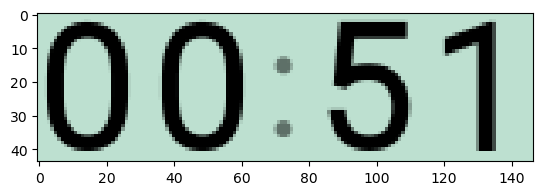

In [109]:
plt.imshow(board_img)

In [9]:
board_img.shape

(848, 848, 3)

In [18]:
candidate = remove_background_colours(board_img[3*106:4*106,106*6:106*7,:], )

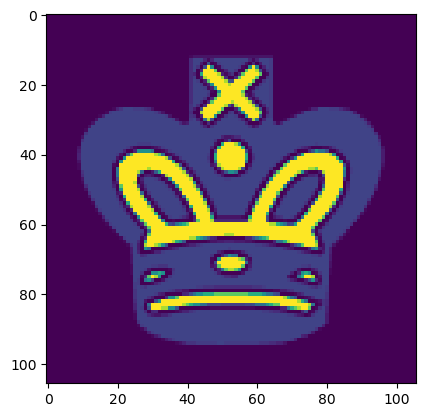

In [19]:
plt.imshow(candidate)

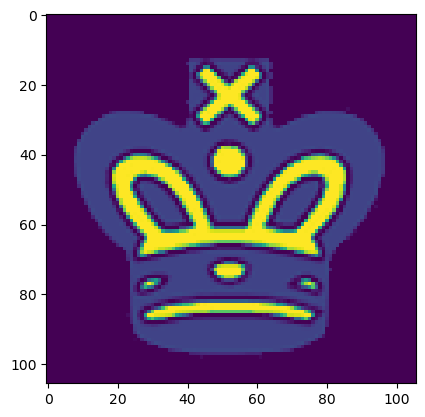

In [17]:
plt.imshow(b_king)

In [21]:
b_king.shape

(106, 106)

In [22]:
template_match_f(np.expand_dims(candidate,0), b_king)

array([0.69187713])

In [ ]:
plt.imshow(cv2.resize(board_img[:106,106:212,:], ( 400, 400 ), interpolation = cv2.INTER_CUBIC ))

In [65]:
board_img[520,314,:]

array([209, 250, 247], dtype=uint8)

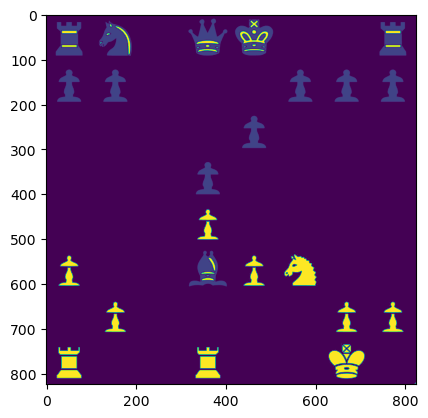

In [66]:
plt.imshow(remove_background_colours(board_img, thresh=1.04).astype(np.uint8))

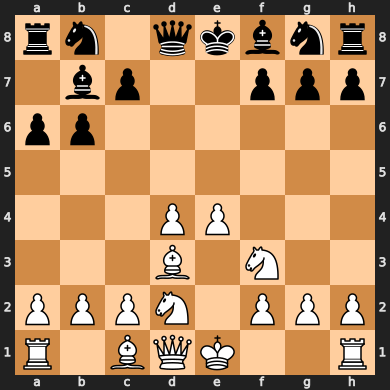

In [40]:
chess.Board(get_fen_from_image(board_img, bottom='b', turn=None))

In [7]:
def check_turn_from_last_moved(fen, board_img, bottom):
    detected_moved = detect_last_move_from_img(board_img)
    if len(detected_moved) == 0:
        return chess.Board(fen).turn == chess.WHITE # didn't detect any new moves. Can only assume it's white turn from opening position
    board = chess.Board(fen)
    test_turn = board.turn
    colour_count = 0
    for square in detected_moved:
        if bottom == "w":
            colour = board.color_at(chess.square_mirror(square))
        else:
            colour = board.color_at(chess.square_mirror(63-square))
            print(chess.square_name(chess.square_mirror(63-square)))
        if colour is not None:
            colour_count += 2*((colour == test_turn)-0.5)
    if colour_count == 0:
        # there was error, return None
        return None
    elif colour_count < 0:
        return True # then current turn is correct
    else:
        return False # current turn is incorrect
        
check_turn_from_last_moved("rnbqkbnr/pp3ppp/8/2p5/4P3/2N2N2/PPPP1PPP/R1BQKB1R w - - 0 1", board_img, "b")

d7


In [25]:
chess.square_name(8)

'a2'

In [24]:
chess.Board(fen).color_at(3)

True

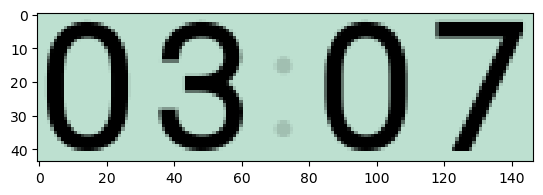

In [16]:
plt.imshow(bot_clock_img)

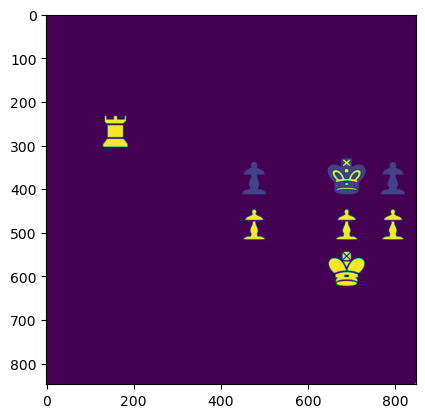

In [20]:
plt.imshow(remove_background_colours(board_img, thresh=1.1))

In [15]:
BOTTOM_CLOCK_Y

742

In [2]:
import time
import numpy as np

In [3]:
time.sleep(3)
print(is_our_turn_from_clock())

False


In [4]:
import matplotlib.pyplot as plt

In [22]:
time.sleep(3)
im = SCREEN_CAPTURE.capture((BOTTOM_CLOCK_X,BOTTOM_CLOCK_Y, CLOCK_WIDTH, CLOCK_HEIGHT))
img= im[:,:,:3]
colours = img.reshape(-1,3)

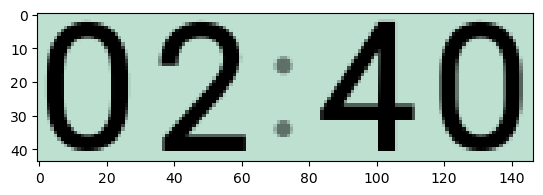

In [23]:
plt.imshow(img)

In [24]:
has_red = (colours[:,1] > 1.1*colours[:,0]).any()

In [19]:
set([tuple(x) for x in colours])

{(77, 77, 77),
 (78, 78, 78),
 (79, 79, 79),
 (80, 80, 80),
 (81, 81, 81),
 (82, 82, 82),
 (83, 83, 83),
 (84, 84, 84),
 (85, 85, 85),
 (86, 86, 86),
 (87, 87, 87),
 (88, 88, 88),
 (89, 89, 89),
 (90, 90, 90),
 (91, 91, 91),
 (92, 92, 92),
 (93, 93, 93),
 (94, 94, 94),
 (96, 96, 96),
 (98, 98, 98),
 (99, 99, 99),
 (100, 100, 100),
 (101, 101, 101),
 (102, 102, 102),
 (103, 103, 103),
 (104, 104, 104),
 (105, 105, 105),
 (106, 106, 106),
 (107, 107, 107),
 (108, 108, 108),
 (110, 110, 110),
 (111, 111, 111),
 (113, 113, 113),
 (115, 115, 115),
 (116, 116, 116),
 (118, 118, 118),
 (120, 120, 120),
 (121, 121, 121),
 (122, 122, 122),
 (123, 123, 123),
 (124, 124, 124),
 (125, 125, 125),
 (126, 126, 126),
 (127, 127, 127),
 (128, 128, 128),
 (129, 129, 129),
 (131, 131, 131),
 (132, 132, 132),
 (133, 133, 133),
 (134, 134, 134),
 (135, 135, 135),
 (136, 136, 136),
 (138, 138, 138),
 (139, 139, 139),
 (140, 140, 140),
 (141, 141, 141),
 (143, 143, 143),
 (145, 145, 145),
 (146, 146, 146),
 

In [25]:
has_red

True

In [1]:
!python scrape_test.py

[] R
[] N
[] B
[] K
[] Q
[] P
[60] r
[] n
[] b
[] k
[] q
[] p
0.0902407169342041


In [14]:
a = np.random.random((5,2,2))
b = np.random.random((3,2,2))

In [16]:
a

array([[[0.44354731, 0.50179784],
        [0.71711982, 0.88292018]],

       [[0.43212998, 0.73404655],
        [0.52757514, 0.75735944]],

       [[0.65994523, 0.25468961],
        [0.72482907, 0.76481429]],

       [[0.38246707, 0.31106965],
        [0.82864031, 0.54309262]],

       [[0.50545216, 0.38250079],
        [0.16264507, 0.6393245 ]]])

In [17]:
b

array([[[0.71289048, 0.40064763],
        [0.19115635, 0.27047006]],

       [[0.26505368, 0.28038566],
        [0.67471557, 0.34609142]],

       [[0.41785048, 0.25339582],
        [0.55156168, 0.7082813 ]]])

In [29]:
a_prime=  np.expand_dims(a,1)
b_prime = np.expand_dims(b,0)

In [31]:
c_prime = a_prime.sum(axis=(-1,-2)) * b_prime.sum(axis=(-1,-2))

In [32]:
c_prime.shape

(5, 3)

In [33]:
(a_prime * b_prime).sum(axis=(-1,-2)).shape

(5, 3)

In [37]:
d = c_prime.argmax(axis=0)

In [40]:
c_prime

array([[4.00940039, 3.98670016, 4.91536599],
       [3.86090324, 3.83904377, 4.73331438],
       [3.78713371, 3.7656919 , 4.64287586],
       [3.25313947, 3.234721  , 3.98822008],
       [2.661906  , 2.64683496, 3.26339128]])

In [54]:
np.where(c_prime[d][0]>3)

(array([0, 1, 2]),)

In [48]:
d

array([0, 0, 0])